In [1]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 1.13.1 cuda: True
mmdetection: 3.2.0
mmcv: 2.0.1
mmengine: 0.9.0


In [2]:
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 1.6 MB/s eta 0:00:0000:0100:08
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth to /home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/demo/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/demo/checkpoints


In [3]:
import mmcv
import mmengine
from mmdet.apis import init_detector,inference_detector
from mmdet.utils import register_all_modules
config_file="/home/bocheng/dev/source_code/cv/mmdetection/configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py"
checkpoint_file="./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth"

register_all_modules()
model=init_detector(config_file,checkpoint_file,device='cuda:0')

Loads checkpoint by local backend from path: ./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [6]:
inferencer=DetInferencer(model='rtmdet_tiny_8xb32-300e_coco',weights='/home/bocheng/.cache/torch/hub/checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth')

Loads checkpoint by local backend from path: /home/bocheng/.cache/torch/hub/checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



/home/bocheng/softinstalled/anaconda3/envs/cv/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [4]:
array=mmcv.imread("/home/bocheng/data/images/kitti_tiny/training/image_2/000001.jpeg",channel_order='rgb')
res=inference_detector(model,array)
print(res)

<DetDataSample(

    META INFORMATION
    img_id: 0
    scale_factor: (1.0732689210950082, 1.072)
    pad_shape: (416, 1344)
    img_shape: (402, 1333)
    img_path: None
    ori_shape: (375, 1242)
    batch_input_shape: (416, 1344)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            masks: BitmapMasks(num_masks=0, height=375, width=1242)
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            bboxes: tensor([], device='cuda:0', size=(0, 4))
        ) at 0x7fb419dfb370>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            masks: tensor([[[False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         ...,
                         [False, False, False,  ...,

In [7]:
from mmdet.registry import VISUALIZERS
visualizer=VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta=model.dataset_meta

/home/bocheng/softinstalled/anaconda3/envs/cv/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


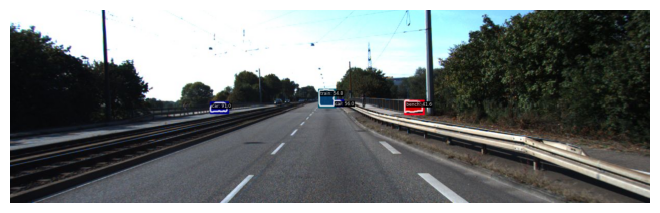

In [6]:
visualizer.add_datasample('result',array,data_sample=res,draw_gt=None,wait_time=0)
visualizer.show()

# 在自定义数据集上训练检测器

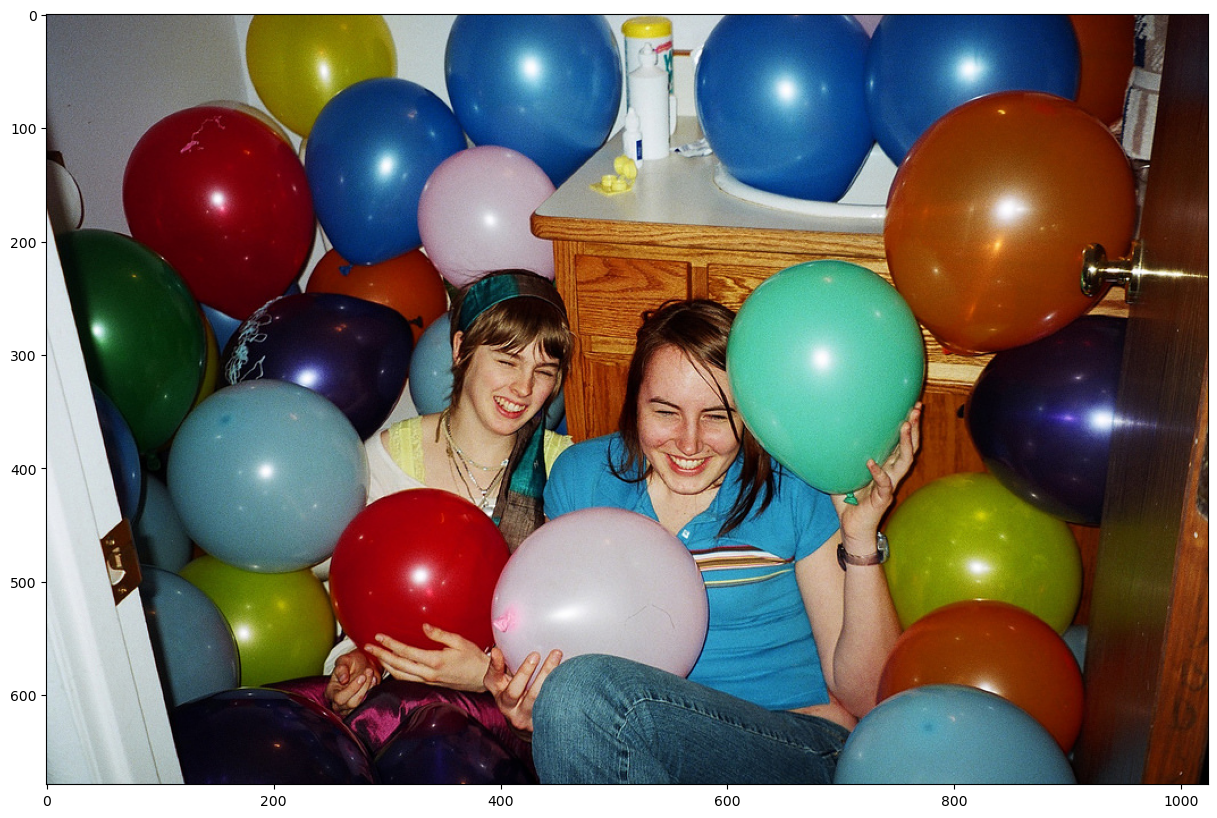

In [8]:
import mmcv
import matplotlib.pyplot as plt
img=mmcv.imread("/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/train/120853323_d4788431b9_b.jpg")
plt.figure(figsize=(15,10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [9]:
import mmengine
annotation=mmengine.load("/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/train/via_region_data.json")

In [12]:
annotation["34020010494_e5cb88e1c4_k.jpg1115004"]

{'fileref': '',
 'size': 1115004,
 'filename': '34020010494_e5cb88e1c4_k.jpg',
 'base64_img_data': '',
 'file_attributes': {},
 'regions': {'0': {'shape_attributes': {'name': 'polygon',
    'all_points_x': [1020,
     1000,
     994,
     1003,
     1023,
     1050,
     1089,
     1134,
     1190,
     1265,
     1321,
     1361,
     1403,
     1428,
     1442,
     1445,
     1441,
     1427,
     1400,
     1361,
     1316,
     1269,
     1228,
     1198,
     1207,
     1210,
     1190,
     1177,
     1172,
     1174,
     1170,
     1153,
     1127,
     1104,
     1061,
     1032,
     1020],
    'all_points_y': [963,
     899,
     841,
     787,
     738,
     700,
     663,
     638,
     621,
     619,
     643,
     672,
     720,
     765,
     800,
     860,
     896,
     942,
     990,
     1035,
     1079,
     1112,
     1129,
     1134,
     1144,
     1153,
     1166,
     1166,
     1150,
     1136,
     1129,
     1122,
     1112,
     1084,
     1037,
     989,

In [13]:
from pycocotools.coco import COCO
annotation_file="/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/train/annotation_coco.json"
coco=COCO(annotation_file)
categories=coco.loadCats(coco.getCatIds())
categories

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


[{'id': 0, 'name': 'balloon'}]

In [14]:
!ls checkpoints

mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py
mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [1]:
from mmengine import Config
cfg = Config.fromfile('/home/bocheng/dev/source_code/cv/mmdetection/configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-1x_coco.py')

In [2]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
    'classes': ('balloon', ),
    'palette': [
        (220, 20, 60),
    ]
}

# Modify dataset type and path
cfg.data_root = '/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/'

cfg.train_dataloader.dataset.ann_file = 'train/annotation_coco.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = '/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'val/annotation_coco.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = '/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/val/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader = cfg.val_dataloader

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'val/annotation_coco.json'
cfg.test_evaluator = cfg.val_evaluator

# Modify num classes of the model in box head and mask head
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10


# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
# cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

#------------------------------------------------------
config='mask-rcnn_r50-caffe_fpn_ms-poly-3x_balloon.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [3]:
!python /home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/train.py --config {config}

10/19 10:39:36 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:39:03) [GCC 11.3.0]
    CUDA available: True
    numpy_random_seed: 1452311194
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /home/bocheng/softinstalled/anaconda3/envs/cv
    NVCC: Cuda compilation tools, release 11.7, V11.7.99
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 1.13.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;

In [5]:
import mmcv
from mmdet.apis import init_detector,inference_detector
img=mmcv.imread("/home/bocheng/dev/mylearn/CV-Learning/mmdetection-learning/train_demo/balloon/train/120853323_d4788431b9_b.jpg",channel_order='rgb')
checkpoint_file="./tutorial_exps/epoch_12.pth"
model=init_detector(cfg,checkpoint_file,device='cpu')
new_result=inference_detector(model,img)
print(new_result)

Loads checkpoint by local backend from path: ./tutorial_exps/epoch_12.pth
<DetDataSample(

    META INFORMATION
    img_shape: (800, 1206)
    ori_shape: (679, 1024)
    scale_factor: (1.177734375, 1.1782032400589102)
    pad_shape: (800, 1216)
    img_path: None
    batch_input_shape: (800, 1216)
    img_id: 0

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            masks: BitmapMasks(num_masks=0, height=679, width=1024)
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7f316c083700>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            masks: tensor([[[False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         ...,
           

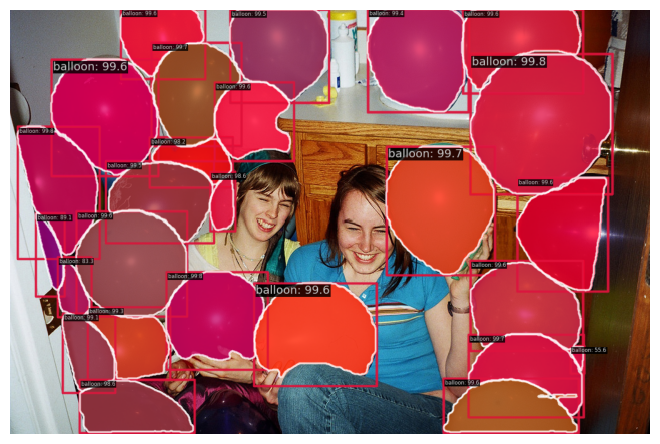

In [9]:
from mmengine.visualization import Visualizer
visualizer_now=Visualizer.get_current_instance()
visualizer_now.dataset_meta=model.dataset_meta
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.5
)
visualizer_now.show()